In [1]:
# 모듈 불러오기
import pandas as pd
import numpy as np
import re
import ast

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 한국어 설정
from matplotlib import font_manager, rc
rc('font', family='Malgun Gothic')

In [295]:
# 데이터 불러오기 1
imdb = pd.read_excel('./imdb_final_5.xlsx', index_col=0)

# imdb
for i in range(1, 18):
    imdb['season_{}'.format(i)] = imdb.loc[imdb['season_{}'.format(i)].notnull(), 'season_{}'.format(i)].apply(ast.literal_eval)

imdb.tail()

,korean_title,english_title,year,imdb_season_num_new_1,total_season_num,runtime,genre,age_rating,production_country,total_count,...,season_13,season_14,season_15,season_16,season_17,director,writer,actor,imdb_title,imdb_url
901,레일라,Leila,2019,1,1,46,"드라마, 전쟁, SF",15,인도,9300,...,NaN,NaN,NaN,NaN,NaN,"['Deepa Mehta', 'Pawan Kumar', 'Shanker Raman']","['Asad Hussain', 'Deepa Mehta', 'Patrick Graha...","['Huma Qureshi', 'Rahul Khanna', 'Siddharth', ...",Leila (TV Series 2019),https://www.imdb.com/title/tt9337588/
902,100만 엔의 여인들,Million Yen Women,2017,1,1,30,"스릴러, 범죄, 드라마, 로맨스",19,일본,2100,...,NaN,NaN,NaN,NaN,NaN,"['Hiroto Hara', 'Hirotoshi Hara', 'Kenji Kuwaj...","['Shunjû Aono', 'Yoshimiko Murooka', 'Yoshitak...","['Yôjirô Noda', 'Rila Fukushima', 'Rena Matsui...",1000000 yen no Onnatachi (TV Mini Series 2017),https://www.imdb.com/title/tt6686450/
903,킬러 코미디언,Hasmukh,2020,1,1,33,"범죄, 드라마, 스릴러, 코미디",19,인도,2800,...,NaN,NaN,NaN,NaN,NaN,['Nikhil Gonsalves'],"['Amogh Ranadive', 'Neeraj Pandey', 'Nikhil Go...","['Vir Das', 'Ranvir Shorey', 'Amrita Bagchi', ...",Hasmukh (TV Mini Series 2020),https://www.imdb.com/title/tt9359294/
904,달러,Dollar,2019,1,1,41,"액션, 드라마, 로맨스",15,레바논,651,...,NaN,NaN,NaN,NaN,NaN,['Samer Al Barkawi'],['Hisham Hilal'],"['Mark Lewis', 'Adel Karam', 'Amel Bouchoucha'...",Dollar (TV Series 2019),https://www.imdb.com/title/tt10687564/
905,"엘리트들, 못다 한 이야기: 나디아 구스만",Elite Short Stories: Nadia Guzmán,2021,1,1,11,"드라마, 로맨스",15+,스페인,2100,...,NaN,NaN,NaN,NaN,NaN,['Dani de la Orden'],['Carlos Montero'],"['Miguel Bernardeau', 'Mina El Hammani', 'Omar...",Elite Short Stories: Nadia Guzmán (TV Mini Ser...,https://www.imdb.com/title/tt14671790/


In [346]:
# 데이터 불러오기 2
watcha = pd.read_excel('./watcha.xlsx', index_col=0)

# watcha
for i in range(1, 18):
    watcha['season_{}'.format(i)] = watcha.loc[watcha['season_{}'.format(i)].notnull(), 'season_{}'.format(i)].apply(ast.literal_eval)

# 컬럼 수정
watcha['total_season_num'] = imdb['total_season_num']

watcha.reset_index(drop=True, inplace=True)

watcha.tail()

,korean_title,english_title,year,total_season_num,production_country,watcha_name,season_1,season_2,season_3,season_4,...,season_8,season_9,season_10,season_11,season_12,season_13,season_14,season_15,season_16,season_17
900,레일라,Leila,2019,1,인도,['레일라'],"[3.2, 27, 3]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901,100만 엔의 여인들,Million Yen Women,2017,1,일본,['100만 엔의 여자들'],"[3.0, 718, 100]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902,킬러 코미디언,Hasmukh,2020,1,인도,['킬러 코미디언'],"[1.6, 4, 0]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903,달러,Dollar,2019,1,레바논,['달러'],"[0.7, 3, 1]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,"엘리트들, 못다 한 이야기: 나디아 구스만",Elite Short Stories: Nadia Guzmán,2021,1,스페인,"['엘리트들, 못다 한 이야기: 나디아 구스만']","[2.8, 420, 30]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [296]:
# 데이터 분리
season_many = imdb[imdb['total_season_num'] >= 2]
season_one = imdb[imdb['total_season_num'] < 2]

## 1. 시즌과 다른 컬럼 간 관계 알아보기

### (1) total_rate
- total_rate를 시즌 별로 살펴본 결과 선형적으로 증가함
- 시즌 2 이상 나온 드라마는 시즌 1 펻점이 조금 더 높게 나옴
- 후속 시즌이 나왔다는 것은 평점이 어느 정도 좋았음을 의미하는 것인가?

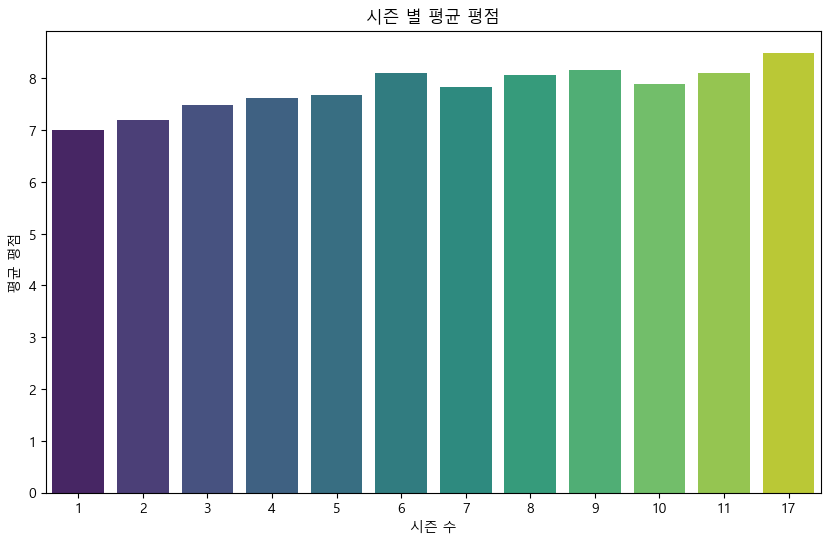

In [297]:
# 시즌 별 평균 평점
season_rate_data = imdb.groupby('total_season_num')['total_rate'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='total_season_num', y='total_rate', data=season_rate_data, palette='viridis')
plt.title('시즌 별 평균 평점')
plt.xlabel('시즌 수')
plt.ylabel('평균 평점')
plt.show()

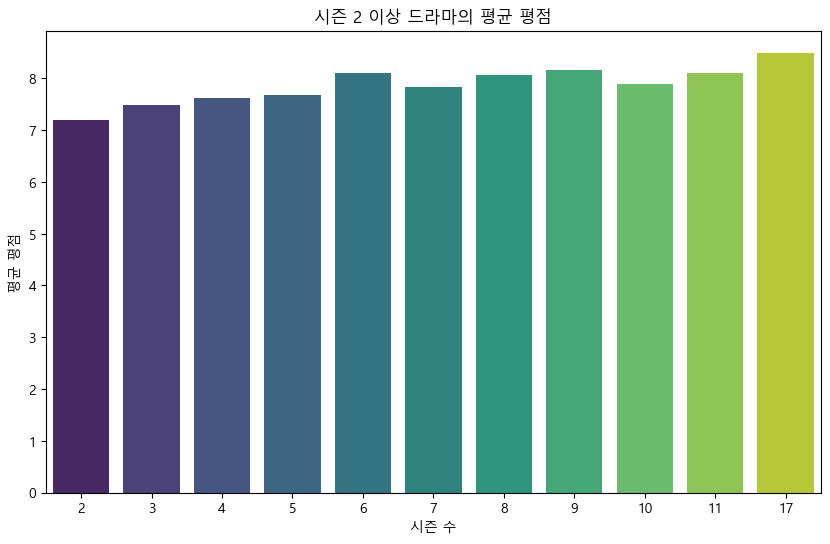

In [298]:
# 시즌 2 이상 드라마 별 평균 평점
season_rate_data = season_many.groupby('total_season_num')['total_rate'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='total_season_num', y='total_rate', data=season_rate_data, palette='viridis')
plt.title('시즌 2 이상 드라마의 평균 평점')
plt.xlabel('시즌 수')
plt.ylabel('평균 평점')
plt.show()

### (2) 시즌 별 평점 (에피소드 이용)
- total_rate를 이용했을 때보다 전반적으로 평점이 0.5점 정도 높음
- 에피소드별 평점은 즉각적으로 반응할 수 있기 때문에 더 높은 것이 아닐까 추측함
- 시즌 2 이상 드라마의 경우 시즌 1만 존재하는 드라마에 비해 시즌 1 평점이 확실히 좋았음 (약 0.2 이상 높음)

In [299]:
# 에피소드를 이용한 시즌 별 평점 매기는 함수 만들기
def get_rating_by_episode(df):

    # 데이터 프레임 및 컬럼 만들기
    season_columns = [col for col in df.columns if col.startswith('season')]
    df_data = pd.DataFrame(columns=season_columns)

    for i in range(1, len(season_columns)+1):

        # 결측치가 없는 행만 추출
        df_tmp = df.loc[df['season_{}'.format(i)].notnull()]
        df_total_rating = []
    
        for idx, row in df_tmp.iterrows():
            rating = []
            df_rating = df_tmp.loc[idx, 'season_{}'.format(i)]
    
            for season, val in df_rating.items():
                rating.append(val[0])

            # 각 드라마의 평균을 df_total_rating에 넣음
            df_total_rating.append(sum(rating) / len(rating))
        df_data.at[0, 'season_{}'.format(i)] = df_total_rating

    return df_data

In [300]:
# 평점 출력
def print_rating_by_episode(df):
    df_data = get_rating_by_episode(df)

    for i in range(1, 18):
        print('season_{}:'.format(i), round(np.mean(df_data.loc[0, 'season_{}'.format(i)]), 6))

In [301]:
# 전체 드라마
print_rating_by_episode(imdb)

season_1: 7.563323
season_2: 7.74811
season_3: 7.709498
season_4: 7.850915
season_5: 7.869582
season_6: 7.650543
season_7: 7.649676
season_8: 7.740058
season_9: 7.618245
season_10: 7.844613
season_11: 8.117361
season_12: 8.754545
season_13: 8.95
season_14: 8.57
season_15: 8.51
season_16: 8.3
season_17: 9.46


In [302]:
# 시즌 2 이상
print_rating_by_episode(season_many)

season_1: 7.687743
season_2: 7.74811
season_3: 7.709498
season_4: 7.850915
season_5: 7.869582
season_6: 7.650543
season_7: 7.649676
season_8: 7.740058
season_9: 7.618245
season_10: 7.844613
season_11: 8.117361
season_12: 8.754545
season_13: 8.95
season_14: 8.57
season_15: 8.51
season_16: 8.3
season_17: 9.46


In [303]:
# 시즌 1만 있는 드라마
print_rating_by_episode(season_one)

season_1: 7.508815
season_2: nan
season_3: nan
season_4: nan
season_5: nan
season_6: nan
season_7: nan
season_8: nan
season_9: nan
season_10: nan
season_11: nan
season_12: nan
season_13: nan
season_14: nan
season_15: nan
season_16: nan
season_17: nan


C:\Users\mycom\miniconda3\envs\ds_study\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mycom\miniconda3\envs\ds_study\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


### (3) total_count
- 지수적으로 증가하다가 시즌 7에서 감소하고 시즌 8에서 대폭 증가
- 시즌 7이 존재하는 드라마 개수가 적어서 오류가 생긴 것 아닐까 추측해봄

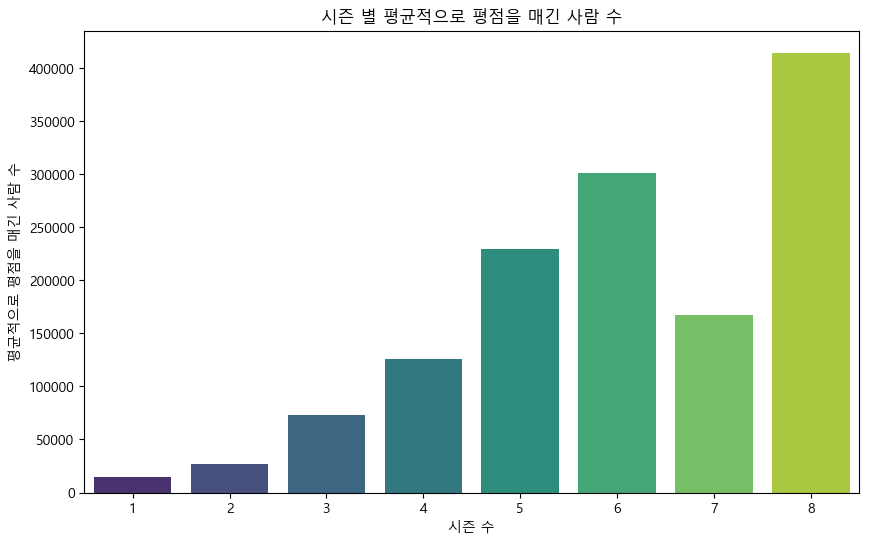

In [304]:
# 시즌 별 평균 평점 매긴 사람 수
season_rate_data = imdb[imdb['total_season_num'] <= 8].groupby('total_season_num')['total_count'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='total_season_num', y='total_count', data=season_rate_data, palette='viridis')
plt.title('시즌 별 평균적으로 평점을 매긴 사람 수')
plt.xlabel('시즌 수')
plt.ylabel('평균적으로 평점을 매긴 사람 수')
plt.show()

### (4) 시즌 별 평점을 매긴 사람 수 (에피소드 이용)
- 시즌 5까지는 증가하다가, 시즌 6에서 소폭 감소함
- 그러나 시즌 7은 대폭 감소 후 시즌 8이 증가하는 패턴은 여전히 관찰됨!
- 시즌 2 이상인 드라마는 2080여 명이 평점을 매긴 반면, 시즌 1만 존재하는 드라마는 450여 명만 평점을 매김
- '평점' 그 자체보다는 '평점을 매긴 사람 수'에서 차이가 많이 나는듯

In [305]:
# 에피소드를 이용한 시즌 별 평점 매긴 사람 수를 구하는 함수
def get_count_by_episode(df):

    # 컬럼 및 데이터 프레임 만들기
    season_columns = [col for col in df.columns if col.startswith('season')]
    df_data = pd.DataFrame(columns=season_columns)

    for i in range(1, len(season_columns)+1):

        # 결측치 없는 행들만 추출
        df_tmp = df.loc[df['season_{}'.format(i)].notnull()]
        df_total_count = []
    
        for idx, row in df_tmp.iterrows():
            count = []
            df_count = df_tmp.loc[idx, 'season_{}'.format(i)]
    
            for season, val in df_count.items():
                count.append(val[1])

            # 각 드라마 별로 평균을 냄
            df_total_count.append(sum(count) / len(count))
        df_data.at[0, 'season_{}'.format(i)] = df_total_count

    return df_data

In [306]:
# 출력 함수
def print_count_by_episode(df):
    df_data = get_count_by_episode(df)

    for i in range(1, 18):
        print('season_{}:'.format(i), round(np.mean(df_data.loc[0, 'season_{}'.format(i)]), 6))

In [307]:
# 전체 드라마
print_count_by_episode(imdb)

season_1: 936.366096
season_2: 1584.238107
season_3: 2456.026007
season_4: 3204.068754
season_5: 4203.547338
season_6: 3847.918065
season_7: 1958.273661
season_8: 2829.040502
season_9: 2811.507265
season_10: 3141.355219
season_11: 3705.722222
season_12: 152.363636
season_13: 155.5
season_14: 1053.8
season_15: 797.2
season_16: 398.0
season_17: 106.6


In [308]:
# 시즌 2 이상
print_count_by_episode(season_many)

season_1: 2015.00398
season_2: 1584.238107
season_3: 2456.026007
season_4: 3204.068754
season_5: 4203.547338
season_6: 3847.918065
season_7: 1958.273661
season_8: 2829.040502
season_9: 2811.507265
season_10: 3141.355219
season_11: 3705.722222
season_12: 152.363636
season_13: 155.5
season_14: 1053.8
season_15: 797.2
season_16: 398.0
season_17: 106.6


In [309]:
# 시즌 1만 있음
print_count_by_episode(season_one)

season_1: 463.819975
season_2: nan
season_3: nan
season_4: nan
season_5: nan
season_6: nan
season_7: nan
season_8: nan
season_9: nan
season_10: nan
season_11: nan
season_12: nan
season_13: nan
season_14: nan
season_15: nan
season_16: nan
season_17: nan


C:\Users\mycom\miniconda3\envs\ds_study\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mycom\miniconda3\envs\ds_study\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


### (5) year
- 과거 드라마들은 비교적 시즌이 긴 편이었거나, 혹은 살아남은 자가 강하다!
- 2007년이 유독 튀는 것은 하트랜드 때문

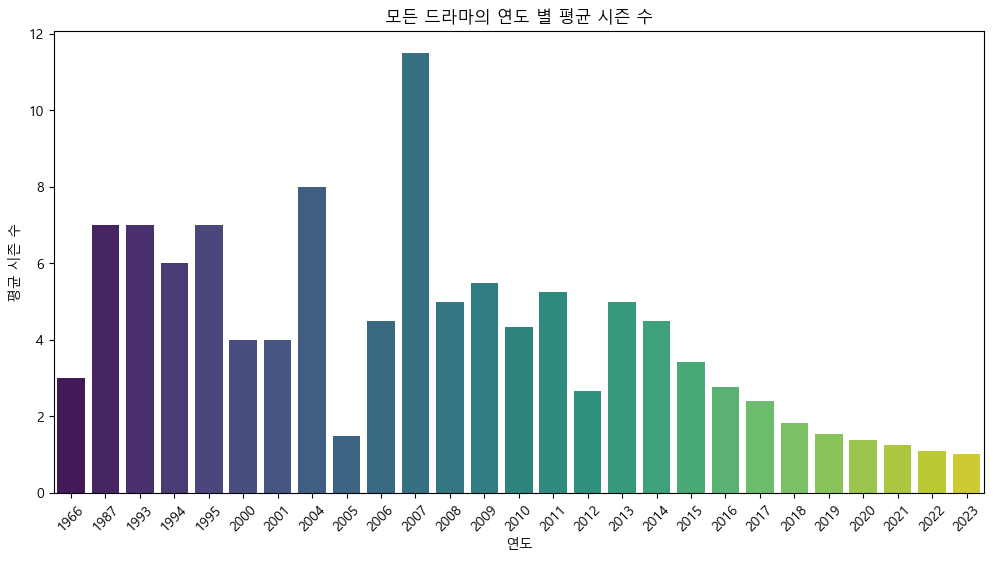

In [310]:
# 모든 드라마
year_season_data = imdb.groupby('year')['total_season_num'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='total_season_num', data=year_season_data, palette='viridis')
plt.title('모든 드라마의 연도 별 평균 시즌 수')
plt.xlabel('연도')
plt.ylabel('평균 시즌 수')
plt.xticks(rotation=45)
plt.show()

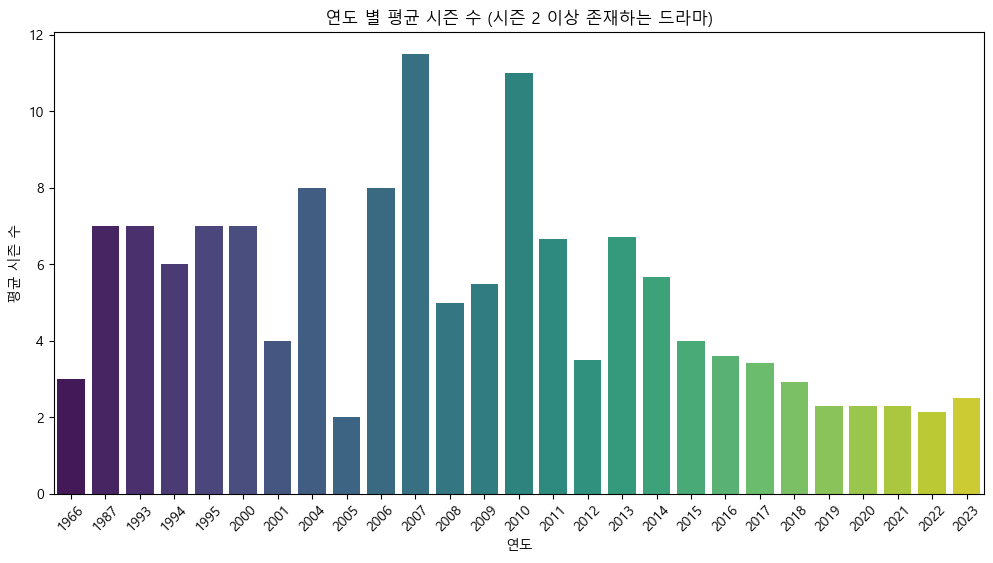

In [311]:
# 시즌 2 이상
year_season_data = season_many.groupby('year')['total_season_num'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='total_season_num', data=year_season_data, palette='viridis')
plt.title('연도 별 평균 시즌 수 (시즌 2 이상 존재하는 드라마)')
plt.xlabel('연도')
plt.ylabel('평균 시즌 수')
plt.xticks(rotation=45)
plt.show()

### (6) age_rating
- 분명 개수만 봐서는 15금, 19금이 많았는데 정작 평균 시즌 개수는 전체 이용가와 12세 이용가가 많음
- 15금의 경우 전체 드라마일 때보다 시즌 2 이상으로 한정했을 때 평균 시즌이 더 높음
- 19금 드라마가 과대평가 됐을 가능성?

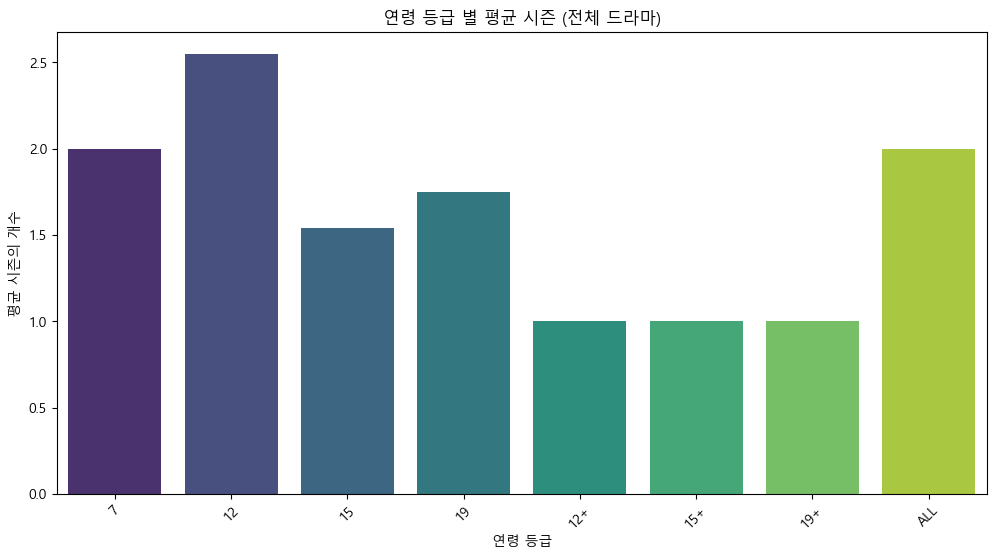

In [312]:
# 모든 드라마
age_rating_season_data = imdb.groupby('age_rating')['total_season_num'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='age_rating', y='total_season_num', data=age_rating_season_data, palette='viridis')
plt.title('연령 등급 별 평균 시즌 (전체 드라마)')
plt.xlabel('연령 등급')
plt.ylabel('평균 시즌의 개수')
plt.xticks(rotation=45)
plt.show()

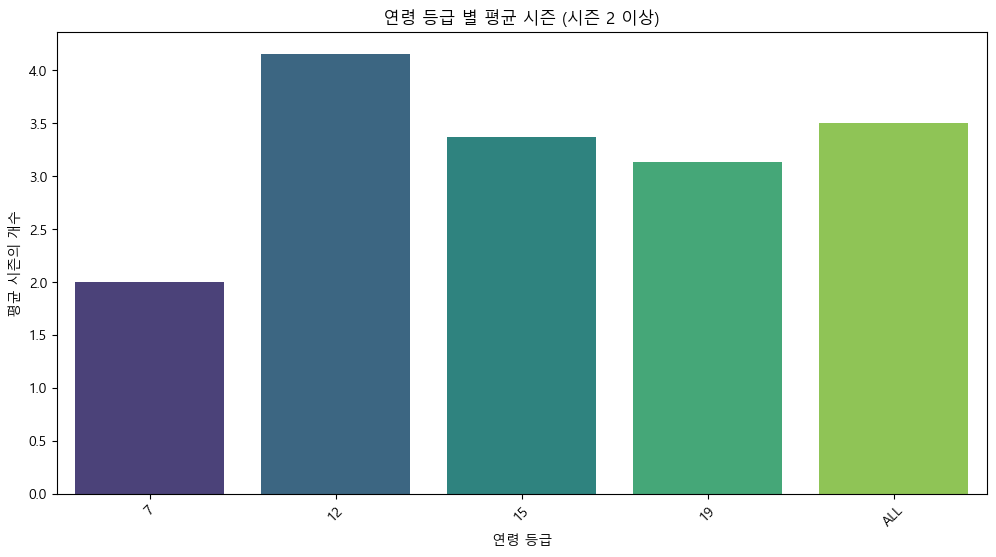

In [313]:
# 시즌 2 이상
age_rating_season_data = season_many.groupby('age_rating')['total_season_num'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='age_rating', y='total_season_num', data=age_rating_season_data, palette='viridis')
plt.title('연령 등급 별 평균 시즌 (시즌 2 이상)')
plt.xlabel('연령 등급')
plt.ylabel('평균 시즌의 개수')
plt.xticks(rotation=45)
plt.show()

### (7) production_country
- 한 국가가 드라마를 몇 개 만들었는지에 대한 고려가 필요할듯
- 드라마를 많이 제작하지 않았음에도 불구하고 인기를 끈 드라마가 있는 경우 평균 시즌이 과대되는 현상
- 최소 5개 이상의 드라마를 제작한 국가로 한정했을 때는 캐나다, 미국, 호주 등 영미권 드라마 선호가 두드러짐

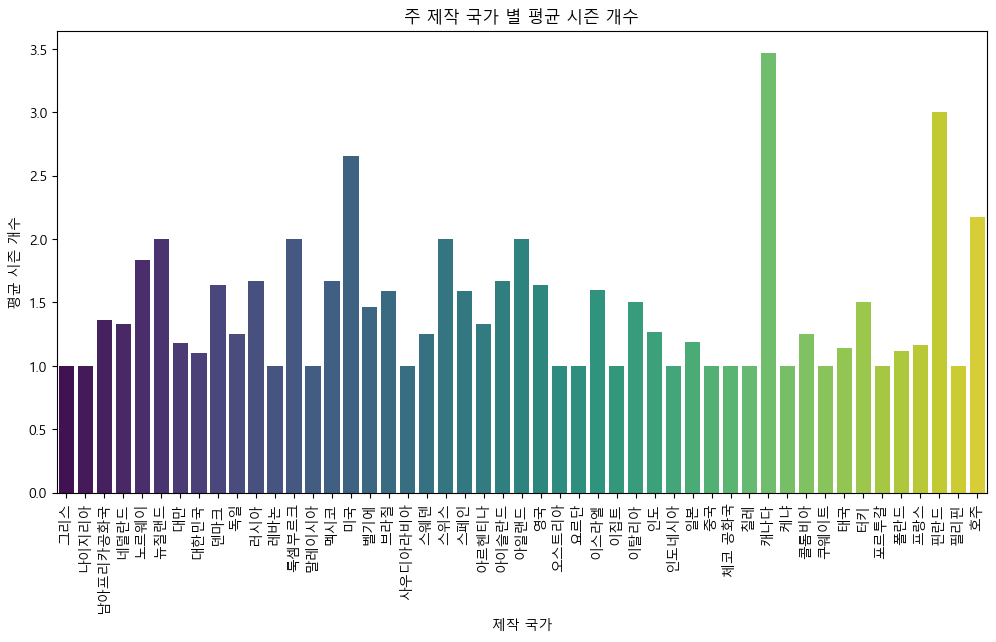

In [314]:
# 모든 드라마

# 데이터 프레임 복제
imdb_data = imdb.copy()

# 주 제작 국가만 추출
imdb_data['primary_production_country'] = imdb_data['production_country'].apply(lambda x: x.split(',')[0] if pd.notna(x) else x)

# 주 제작 국가 별 시즌 개수 평균
production_country_season_data = imdb_data.groupby('primary_production_country')['total_season_num'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_production_country', y='total_season_num', data=production_country_season_data, palette='viridis')
plt.title('주 제작 국가 별 평균 시즌 개수')
plt.xlabel('제작 국가')
plt.ylabel('평균 시즌 개수')
plt.xticks(rotation=90)
plt.show()

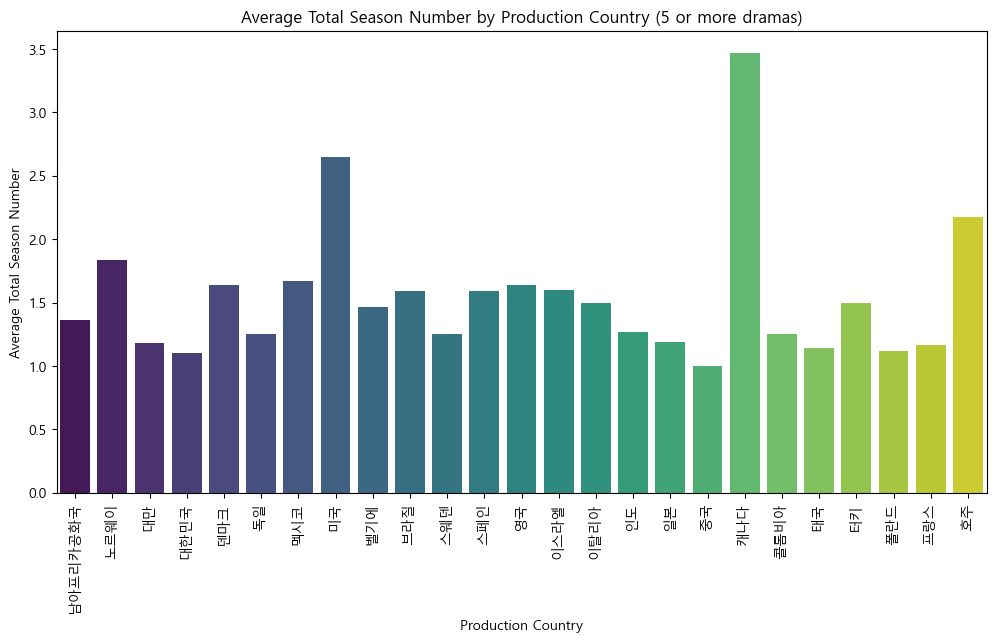

In [315]:
# 모든 드라마를 사용하되 제작 국가가 5개 미만인 것 제외

# 데이터 프레임 복제
imdb_data = imdb.copy()

# Preprocess the production_country to consider only the first country listed
imdb_data['primary_production_country'] = imdb_data['production_country'].apply(lambda x: x.split(',')[0] if pd.notna(x) else x)

# Calculate the count of dramas per primary production country
country_counts = imdb_data['primary_production_country'].value_counts()

# Filter to include only countries with 5 or more dramas
valid_countries = country_counts[country_counts >= 5].index
filtered_data = imdb_data[imdb_data['primary_production_country'].isin(valid_countries)]

# Calculate average total season number by primary production country
production_country_season_data = filtered_data.groupby('primary_production_country')['total_season_num'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_production_country', y='total_season_num', data=production_country_season_data, palette='viridis')
plt.title('Average Total Season Number by Production Country (5 or more dramas)')
plt.xlabel('Production Country')
plt.ylabel('Average Total Season Number')
plt.xticks(rotation=90)
plt.show()

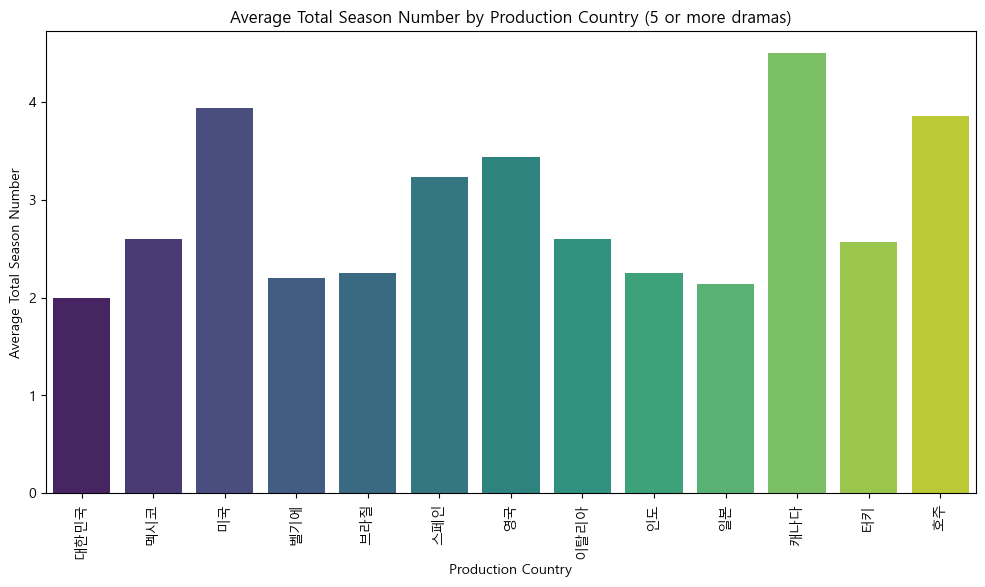

In [316]:
# 시즌 2 이상인 드라마, 그 국가의 드라마가 최소 5개 있는 것만

# 데이터 프레임 복제
imdb_data = season_many.copy()

# Preprocess the production_country to consider only the first country listed
imdb_data['primary_production_country'] = imdb_data['production_country'].apply(lambda x: x.split(',')[0] if pd.notna(x) else x)

# Calculate the count of dramas per primary production country
country_counts = imdb_data['primary_production_country'].value_counts()

# Filter to include only countries with 5 or more dramas
valid_countries = country_counts[country_counts >= 5].index
filtered_data = imdb_data[imdb_data['primary_production_country'].isin(valid_countries)]

# Calculate average total season number by primary production country
production_country_season_data = filtered_data.groupby('primary_production_country')['total_season_num'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_production_country', y='total_season_num', data=production_country_season_data, palette='viridis')
plt.title('Average Total Season Number by Production Country (5 or more dramas)')
plt.xlabel('Production Country')
plt.ylabel('Average Total Season Number')
plt.xticks(rotation=90)
plt.show()

### (8) 제작 국가 별 평점
- 제작 국가 필터링을 하지 않으면 그리스, 인도네시아 드라마의 평점이 높다고 나온다..
- 5개 이상의 드라마를 촬영한 국가로 필터링 할 경우 중국, 대한민국 드라마가 평점이 높게 나옴
- 5개 이상의 드라마를 촬영한 국가 + 2개 시즌 이상의 드라마만 살펴보면 대한민국 드라마가 높게 나옴
- 제작 국가 별 평점에는 큰 차이가 없는듯? 어차피 취향인 사람만 끝까지 봐서 그런가..?

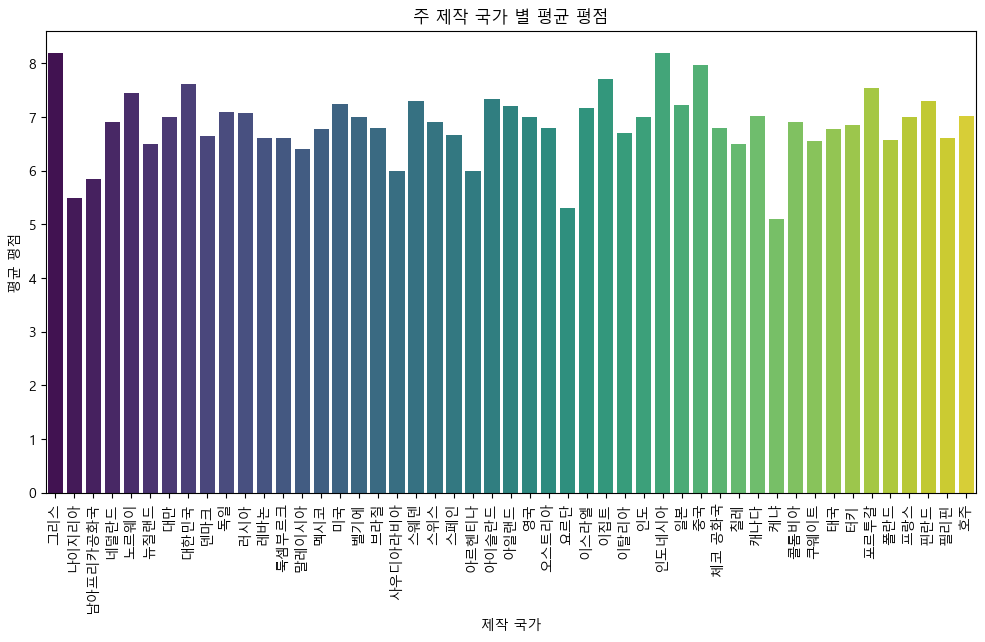

In [317]:
# 모든 드라마

# 데이터 프레임 복제
imdb_data = imdb.copy()

# 주 제작 국가만 추출
imdb_data['primary_production_country'] = imdb_data['production_country'].apply(lambda x: x.split(',')[0] if pd.notna(x) else x)

# 주 제작 국가 별 시즌 개수 평균
production_country_season_data = imdb_data.groupby('primary_production_country')['total_rate'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_production_country', y='total_rate', data=production_country_season_data, palette='viridis')
plt.title('주 제작 국가 별 평균 평점')
plt.xlabel('제작 국가')
plt.ylabel('평균 평점')
plt.xticks(rotation=90)
plt.show()

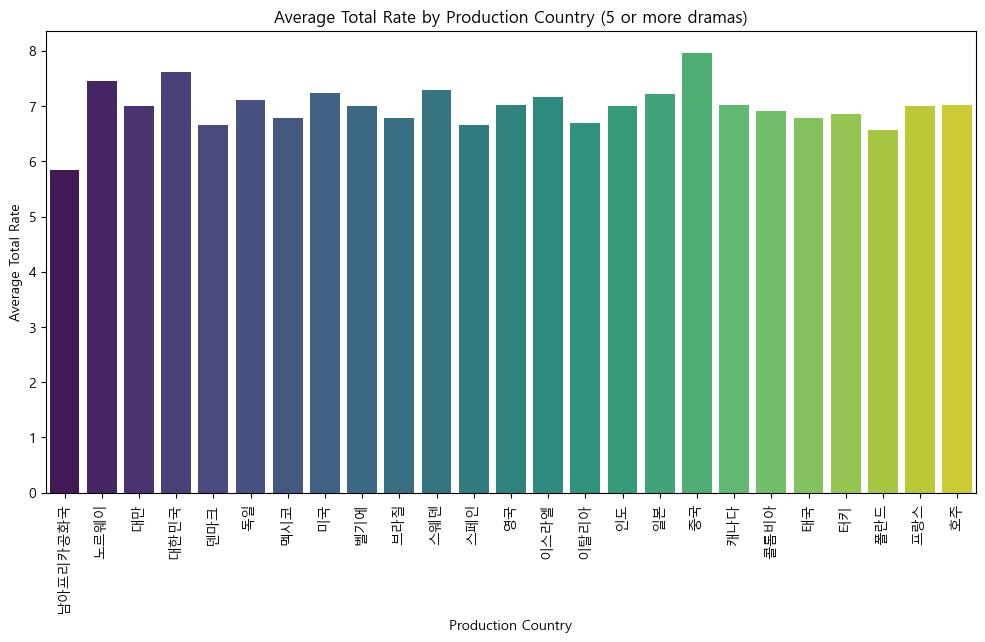

In [318]:
# 제작 국가 5개 이상

# 데이터 프레임 복제
imdb_data = imdb.copy()

# Preprocess the production_country to consider only the first country listed
imdb_data['primary_production_country'] = imdb_data['production_country'].apply(lambda x: x.split(',')[0] if pd.notna(x) else x)

# Calculate the count of dramas per primary production country
country_counts = imdb_data['primary_production_country'].value_counts()

# Filter to include only countries with 5 or more dramas
valid_countries = country_counts[country_counts >= 5].index
filtered_data = imdb_data[imdb_data['primary_production_country'].isin(valid_countries)]

# Calculate average total rate by primary production country for countries with 5 or more dramas
production_country_rate_data = filtered_data.groupby('primary_production_country')['total_rate'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_production_country', y='total_rate', data=production_country_rate_data, palette='viridis')
plt.title('Average Total Rate by Production Country (5 or more dramas)')
plt.xlabel('Production Country')
plt.ylabel('Average Total Rate')
plt.xticks(rotation=90)
plt.show()

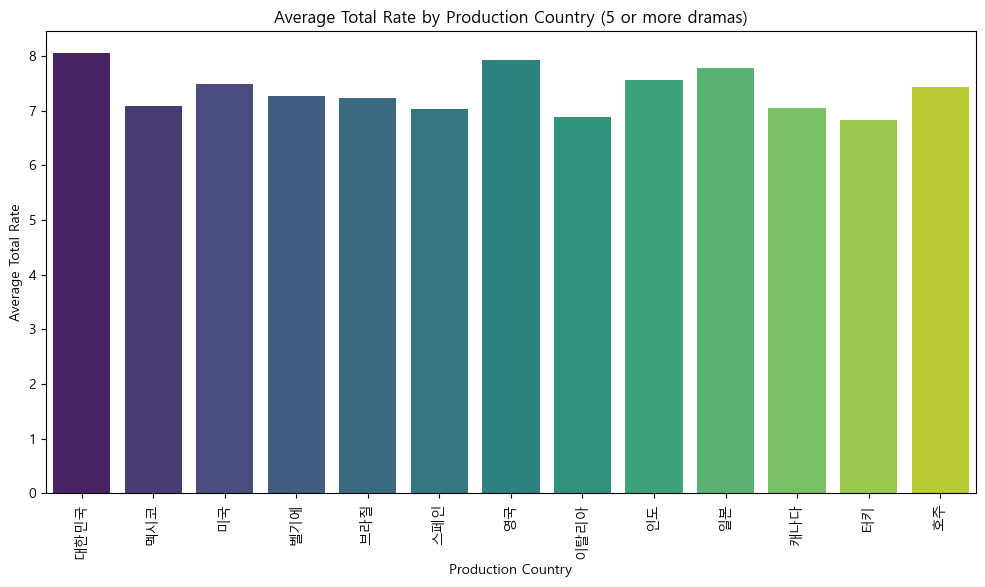

In [319]:
# 제작 국가 5개 이상, 드라마 시즌 2개 이상

# 데이터 프레임 복제
imdb_data = season_many.copy()

# Preprocess the production_country to consider only the first country listed
imdb_data['primary_production_country'] = imdb_data['production_country'].apply(lambda x: x.split(',')[0] if pd.notna(x) else x)

# Calculate the count of dramas per primary production country
country_counts = imdb_data['primary_production_country'].value_counts()

# Filter to include only countries with 5 or more dramas
valid_countries = country_counts[country_counts >= 5].index
filtered_data = imdb_data[imdb_data['primary_production_country'].isin(valid_countries)]

# Calculate average total rate by primary production country for countries with 5 or more dramas
production_country_rate_data = filtered_data.groupby('primary_production_country')['total_rate'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_production_country', y='total_rate', data=production_country_rate_data, palette='viridis')
plt.title('Average Total Rate by Production Country (5 or more dramas)')
plt.xlabel('Production Country')
plt.ylabel('Average Total Rate')
plt.xticks(rotation=90)
plt.show()

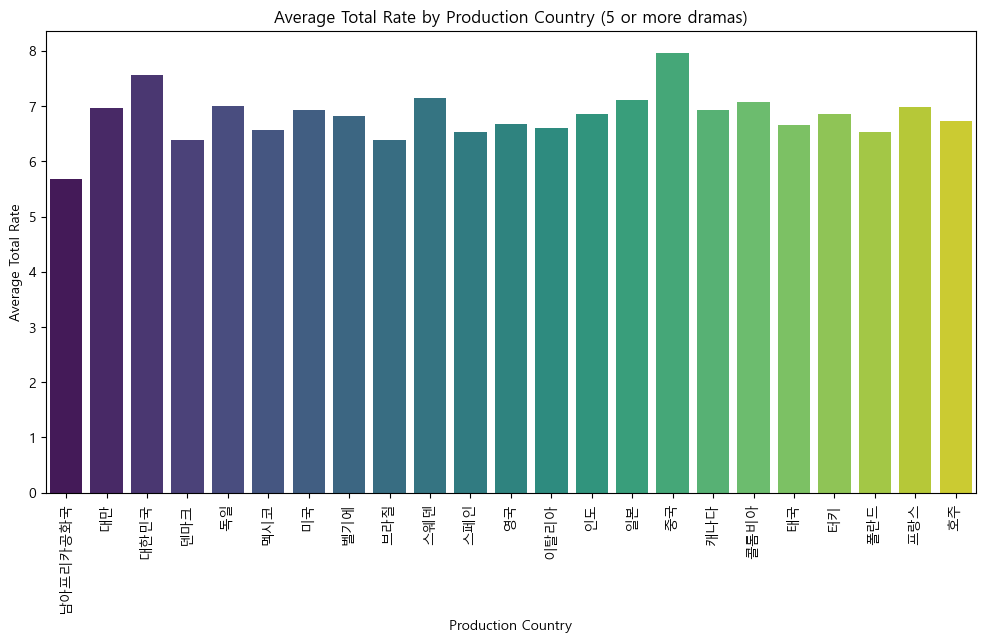

In [320]:
# 데이터 프레임 복제
imdb_data = season_one.copy()

# Preprocess the production_country to consider only the first country listed
imdb_data['primary_production_country'] = imdb_data['production_country'].apply(lambda x: x.split(',')[0] if pd.notna(x) else x)

# Calculate the count of dramas per primary production country
country_counts = imdb_data['primary_production_country'].value_counts()

# Filter to include only countries with 5 or more dramas
valid_countries = country_counts[country_counts >= 5].index
filtered_data = imdb_data[imdb_data['primary_production_country'].isin(valid_countries)]

# Calculate average total rate by primary production country for countries with 5 or more dramas
production_country_rate_data = filtered_data.groupby('primary_production_country')['total_rate'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_production_country', y='total_rate', data=production_country_rate_data, palette='viridis')
plt.title('Average Total Rate by Production Country (5 or more dramas)')
plt.xlabel('Production Country')
plt.ylabel('Average Total Rate')
plt.xticks(rotation=90)
plt.show()

### (9) watchlist
- 시즌 별 평점을 매긴 사람들의 평균 (total_count) 와 비슷한 형태 (total_count가 5시즌만 좀 더 많음)

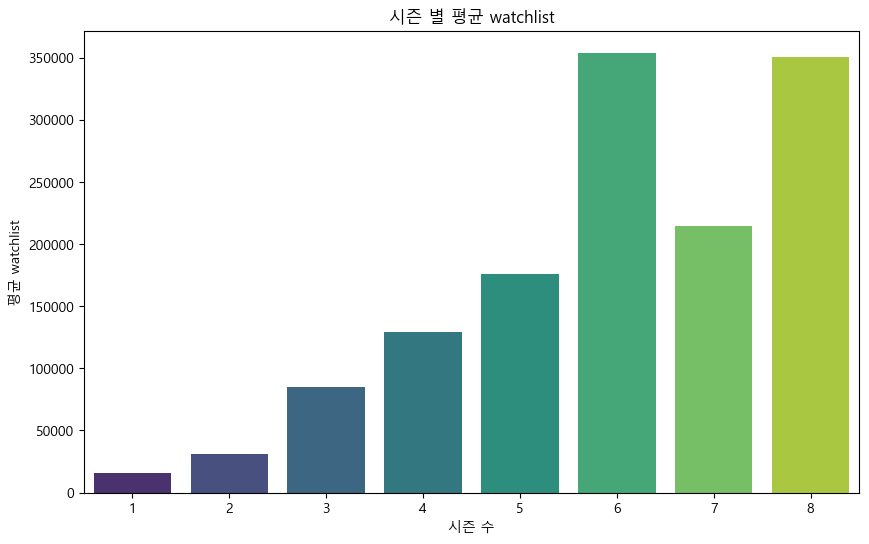

In [321]:
# 모든 드라마

# 시즌 별 평균 평점
season_rate_data = imdb[imdb['total_season_num'] <= 8].groupby('total_season_num')['watchlist'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='total_season_num', y='watchlist', data=season_rate_data, palette='viridis')
plt.title('시즌 별 평균 watchlist')
plt.xlabel('시즌 수')
plt.ylabel('평균 watchlist')
plt.show()

### (10) user_review

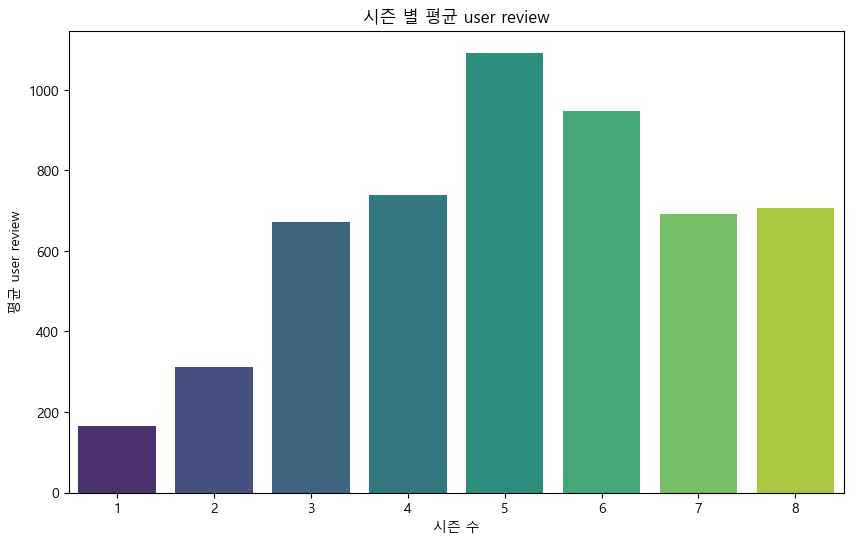

In [322]:
# 시즌 별 평균 평점
season_rate_data = imdb[imdb['total_season_num'] <= 8].groupby('total_season_num')['user_review'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='total_season_num', y='user_review', data=season_rate_data, palette='viridis')
plt.title('시즌 별 평균 user review')
plt.xlabel('시즌 수')
plt.ylabel('평균 user review')
plt.show()

### (11) critic_review

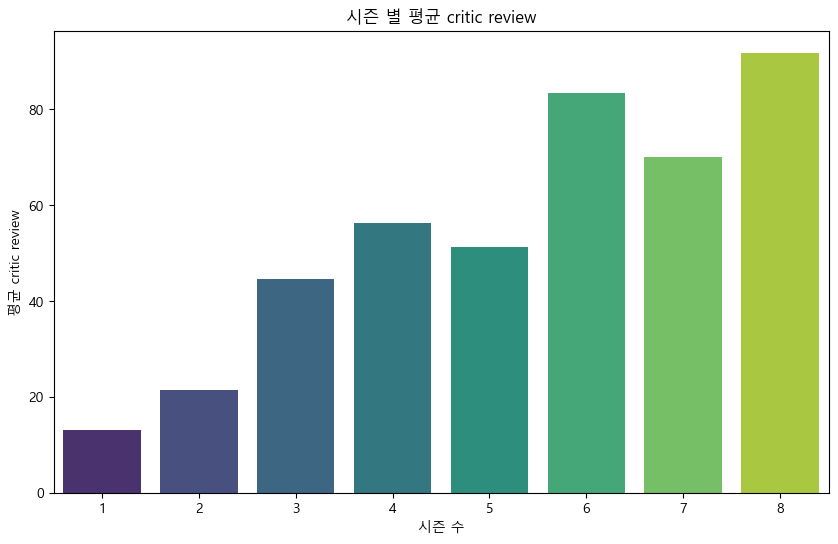

In [323]:
# 시즌 별 평균 평점
season_rate_data = imdb[imdb['total_season_num'] <= 8].groupby('total_season_num')['critic_review'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='total_season_num', y='critic_review', data=season_rate_data, palette='viridis')
plt.title('시즌 별 평균 critic review')
plt.xlabel('시즌 수')
plt.ylabel('평균 critic review')
plt.show()

### (12) 왓챠 평점
- 시즌 8까지 단조 증가함
- 시즌 2 이상 방영된 드라마가 모든 드라마의 시즌 1 평균보다 0.2 높음

In [324]:
# 에피소드를 이용한 시즌 별 평점 매기기
def get_rating_watcha(df):

    season_columns = [col for col in df.columns if col.startswith('season')]
    df_data = pd.DataFrame(columns=season_columns)

    for i in range(1, len(season_columns)+1):
        df_tmp = df.loc[df['season_{}'.format(i)].notnull()]
        df_total_rating = []
    
        for idx, row in df_tmp.iterrows():
            df_rating = df_tmp.loc[idx, 'season_{}'.format(i)]
    
            df_total_rating.append(df_rating[0])
            mean = sum(df_total_rating) / len(df_total_rating)
    
        df_data.at[0, 'season_{}'.format(i)] = mean

    return df_data

In [325]:
def print_rating_watcha(df):
    df_data = get_rating_watcha(df)

    for i in range(1, len(season_columns)+1):
        print('season_{}:'.format(i), round(np.mean(df_data.loc[0, 'season_{}'.format(i)]), 6))

In [343]:
# 모든 드라마
print_rating_watcha(watcha)

season_1: 3.106733
season_2: 3.363296
season_3: 3.459854
season_4: 3.59375
season_5: 3.666
season_6: 3.666667
season_7: 3.695455
season_8: 3.788889
season_9: 3.58
season_10: 3.633333
season_11: 3.7
season_12: 3.9
season_13: 3.9
season_14: 3.3
season_15: 3.5
season_16: 4.5
season_17: 4.5


In [344]:
# 시즌 2 이상
print_rating_watcha(watcha[watcha['total_season_num'] >= 2])

season_1: 3.307609
season_2: 3.363296
season_3: 3.459854
season_4: 3.59375
season_5: 3.666
season_6: 3.666667
season_7: 3.695455
season_8: 3.788889
season_9: 3.58
season_10: 3.633333
season_11: 3.7
season_12: 3.9
season_13: 3.9
season_14: 3.3
season_15: 3.5
season_16: 4.5
season_17: 4.5


### (13) 시즌 별 평점을 매긴 사람 수
- 모든 드라마에 비해 시즌 1만 있는 경우 평점 매긴 사람이 더 많음!!!!
- 시즌 1에서 시즌 2까지 감소폭도 크다
- 시즌 2 이상의 드라마를 살펴보면, imdb는 시즌 1에서 2에서 한 번 감소하고 나면 증가세였던 것과는 달리 한국은 감소 추세..
- IMDb와 한국의 유저 성향이 제법 갈리는듯?
- 이유가 무엇일까.. 한국인은 빠르게 하차하는 걸까? 아니면 왓챠에서 인기 많은 한국 드라마가 시즌 1에서 끝나는 경우가 많아서 그런 걸까?

In [328]:
# 에피소드를 이용한 시즌 별 평점 매기기
def get_count_watcha(df):

    season_columns = [col for col in df.columns if col.startswith('season')]
    df_data = pd.DataFrame(columns=season_columns)

    for i in range(1, len(season_columns)+1):
        df_tmp = df.loc[df['season_{}'.format(i)].notnull()]
        df_total_count = []
    
        for idx, row in df_tmp.iterrows():
            df_count = df_tmp.loc[idx, 'season_{}'.format(i)]
    
            df_total_count.append(df_count[1])
            mean = sum(df_total_count) / len(df_total_count)
    
        df_data.at[0, 'season_{}'.format(i)] = mean

    return df_data

In [329]:
def print_count_watcha(df):
    df_data = get_count_watcha(df)

    for i in range(1, len(season_columns)+1):
        print('season_{}:'.format(i), round(np.mean(df_data.loc[0, 'season_{}'.format(i)]), 6))

In [330]:
# 모든 드라마
print_count_watcha(watcha)

season_1: 13359.640177
season_2: 4544.359551
season_3: 4474.467153
season_4: 4080.275
season_5: 4329.28
season_6: 3695.638889
season_7: 4058.045455
season_8: 6442.666667
season_9: 2161.2
season_10: 884.666667
season_11: 665.5
season_12: 7.0
season_13: 7.0
season_14: 5.0
season_15: 4.0
season_16: 2.0
season_17: 2.0


In [331]:
# 시즌 2 이상
print_count_watcha(watcha[watcha['total_season_num'] >= 2])

season_1: 11370.855072
season_2: 4544.359551
season_3: 4474.467153
season_4: 4080.275
season_5: 4329.28
season_6: 3695.638889
season_7: 4058.045455
season_8: 6442.666667
season_9: 2161.2
season_10: 884.666667
season_11: 665.5
season_12: 7.0
season_13: 7.0
season_14: 5.0
season_15: 4.0
season_16: 2.0
season_17: 2.0


In [332]:
# 시즌 1만 있는 드라마
print_count_watcha(watcha[watcha['total_season_num'] < 2])

season_1: 14230.91746
season_2: 14230.91746
season_3: 14230.91746
season_4: 14230.91746
season_5: 14230.91746
season_6: 14230.91746
season_7: 14230.91746
season_8: 14230.91746
season_9: 14230.91746
season_10: 14230.91746
season_11: 14230.91746
season_12: 14230.91746
season_13: 14230.91746
season_14: 14230.91746
season_15: 14230.91746
season_16: 14230.91746
season_17: 14230.91746


### (14) 왓챠의 시즌 별 평점 (제작 국가 고려)
- 모든 국가를 사용하든, 한국을 제외하든, 한국을 제외한 시즌 2 이상 드라마를 고려하든 큰 차이는 없어 보임

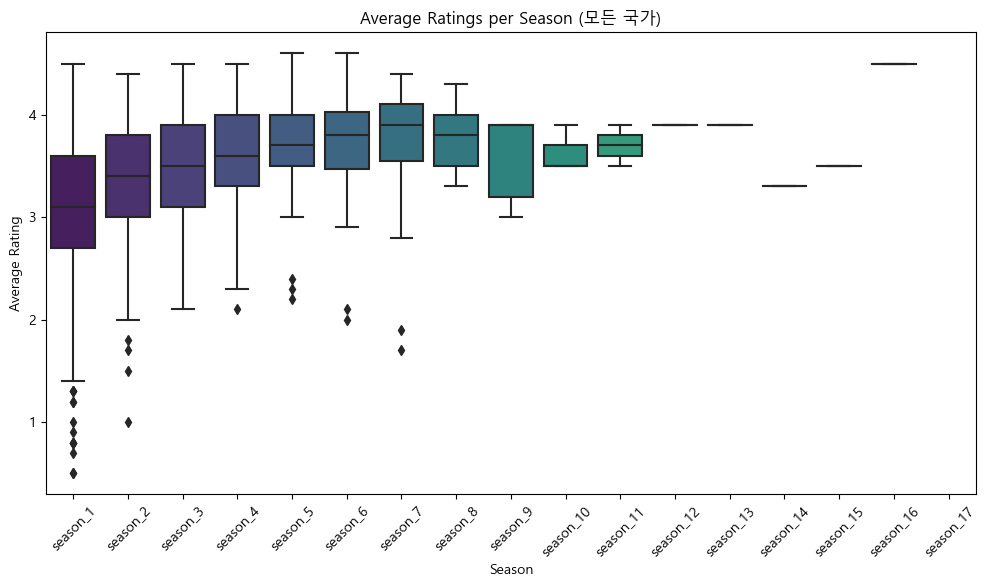

In [333]:
# 데이터 프레임 복제
imdb_data = imdb.copy()
watcha_data = watcha.copy()

# Preprocess the production_country to consider only the first country listed
imdb_data['primary_production_country'] = imdb_data['production_country'].apply(lambda x: x.split(',')[0] if pd.notna(x) else x)

# Merge IMDb and Watcha data to add primary_production_country to Watcha data
watcha_data = pd.merge(watcha_data, imdb_data[['korean_title', 'english_title', 'year', 'primary_production_country']], on=['korean_title', 'english_title', 'year'], how='left')

# Filter out rows where the primary production country is South Korea
watcha_filtered = watcha_data

# Extract season columns from Watcha data
season_columns = [col for col in watcha_filtered.columns if col.startswith('season')]

# Create a DataFrame to store the average ratings per season
average_ratings_per_season = pd.DataFrame()

# Extract the average rating for each season
for season in season_columns:
    average_ratings_per_season[season] = watcha_filtered[season].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 1 else None)

# Melt the DataFrame for easier plotting
average_ratings_per_season_melted = average_ratings_per_season.melt(var_name='Season', value_name='Average Rating')

# Convert 'Average Rating' to numeric (in case it's not already)
average_ratings_per_season_melted['Average Rating'] = pd.to_numeric(average_ratings_per_season_melted['Average Rating'], errors='coerce')

# Plot the data
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='Average Rating', data=average_ratings_per_season_melted, palette='viridis')
plt.title('Average Ratings per Season (모든 국가)')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

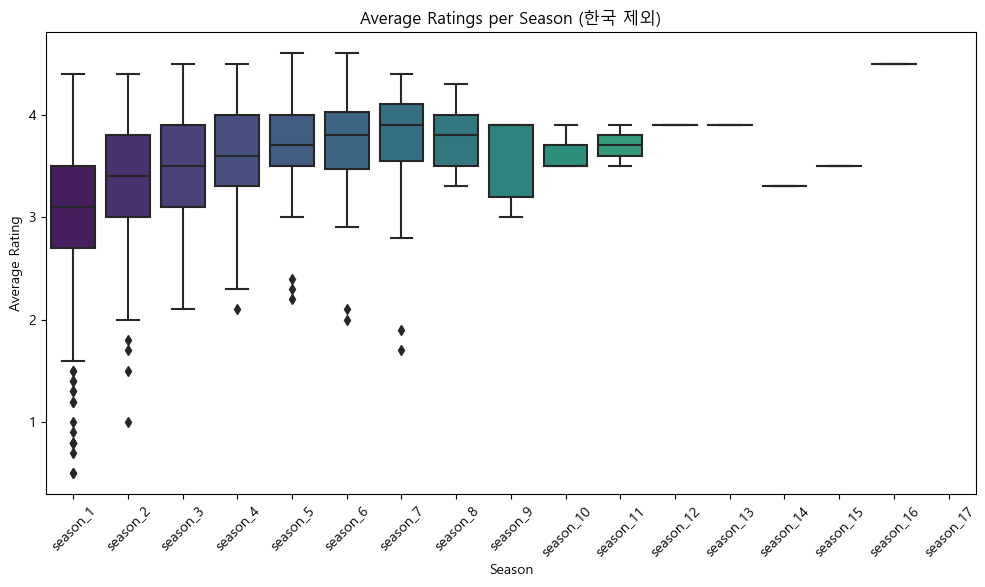

In [334]:
# 데이터 프레임 복제
imdb_data = imdb.copy()
watcha_data = watcha.copy()

# Preprocess the production_country to consider only the first country listed
imdb_data['primary_production_country'] = imdb_data['production_country'].apply(lambda x: x.split(',')[0] if pd.notna(x) else x)

# Merge IMDb and Watcha data to add primary_production_country to Watcha data
watcha_data = pd.merge(watcha_data, imdb_data[['korean_title', 'english_title', 'year', 'primary_production_country']], on=['korean_title', 'english_title', 'year'], how='left')

# Filter out rows where the primary production country is South Korea
watcha_filtered = watcha_data[watcha_data['primary_production_country'] != '대한민국']

# Extract season columns from Watcha data
season_columns = [col for col in watcha_filtered.columns if col.startswith('season')]

# Create a DataFrame to store the average ratings per season
average_ratings_per_season = pd.DataFrame()

# Extract the average rating for each season
for season in season_columns:
    average_ratings_per_season[season] = watcha_filtered[season].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 1 else None)

# Melt the DataFrame for easier plotting
average_ratings_per_season_melted = average_ratings_per_season.melt(var_name='Season', value_name='Average Rating')

# Convert 'Average Rating' to numeric (in case it's not already)
average_ratings_per_season_melted['Average Rating'] = pd.to_numeric(average_ratings_per_season_melted['Average Rating'], errors='coerce')

# Plot the data
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='Average Rating', data=average_ratings_per_season_melted, palette='viridis')
plt.title('Average Ratings per Season (한국 제외)')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

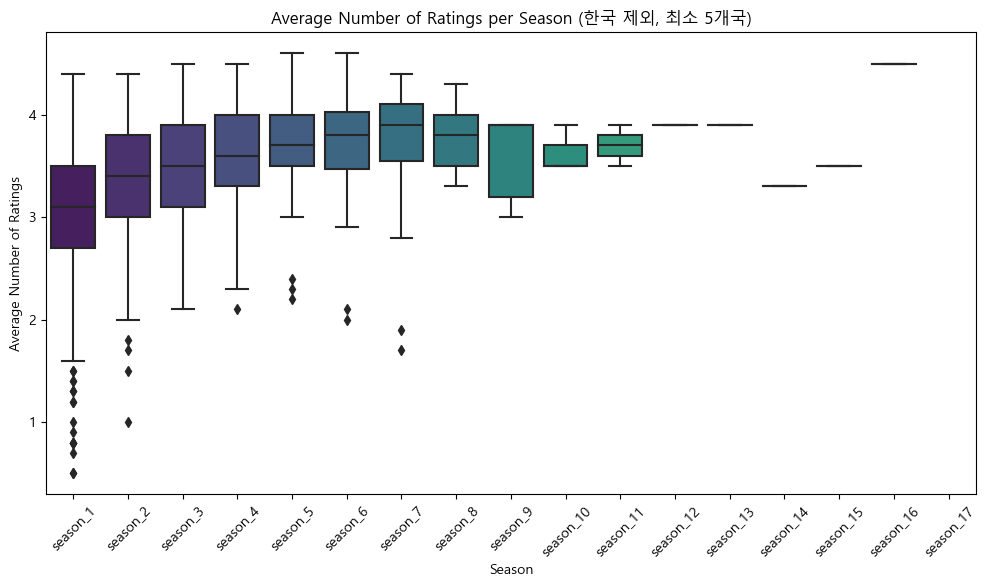

In [335]:
# 데이터 프레임 복제
imdb_data = imdb.copy()
watcha_data = watcha.copy()

# Preprocess the production_country to consider only the first country listed
imdb_data['primary_production_country'] = imdb_data['production_country'].apply(lambda x: x.split(',')[0] if pd.notna(x) else x)

# Merge IMDb and Watcha data to add primary_production_country to Watcha data
watcha_data = pd.merge(watcha_data, imdb_data[['korean_title', 'english_title', 'year', 'primary_production_country']], on=['korean_title', 'english_title', 'year'], how='left')

# Filter out rows where the primary production country is South Korea
watcha_filtered = watcha_data[(watcha_data['primary_production_country'] != '대한민국')]


# Calculate the count of dramas per primary production country
country_counts = watcha_filtered['primary_production_country'].value_counts()

# Filter to include only countries with 5 or more dramas
valid_countries = country_counts[country_counts >= 5].index
filtered_data = watcha_filtered[watcha_filtered['primary_production_country'].isin(valid_countries)]

# Extract season columns from Watcha data
season_columns = [col for col in filtered_data.columns if col.startswith('season')]

# Create a DataFrame to store the average number of ratings per season
average_ratings_per_season = pd.DataFrame()

# Extract the number of ratings for each season and calculate the mean
for season in season_columns:
    average_ratings_per_season[season] = watcha_filtered[season].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 1 else None)

# Melt the DataFrame for easier plotting
average_ratings_per_season_melted = average_ratings_per_season.melt(var_name='Season', value_name='Average Rating')

# Convert 'Average Rating' to numeric (in case it's not already)
average_ratings_per_season_melted['Average Rating'] = pd.to_numeric(average_ratings_per_season_melted['Average Rating'], errors='coerce')

# Plot the data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='Average Rating', data=average_ratings_per_season_melted, palette='viridis')
plt.title('Average Number of Ratings per Season (한국 제외, 최소 5개국)')
plt.xlabel('Season')
plt.ylabel('Average Number of Ratings')
plt.xticks(rotation=45)
plt.show()

### (15) 왓챠의 평점을 매긴 사람 수 (제작 국가 고려)
- 아웃라이어가 너무 많다...
- 한국 드라마를 제외할 경우 이상치가 줄어들긴 하지만 여전히 많음
- 한국 드라마 또는 소수의 인기 드라마를 선호하는듯 (왓챠 이용자들은 쏠림 현상 비스무리한 게 있나봄)
- barplot으로 살펴보면 한국 드라마를 제외했을 때 시즌 1 평점을 매긴 사람들의 평균 인워이 줄어들긴 함

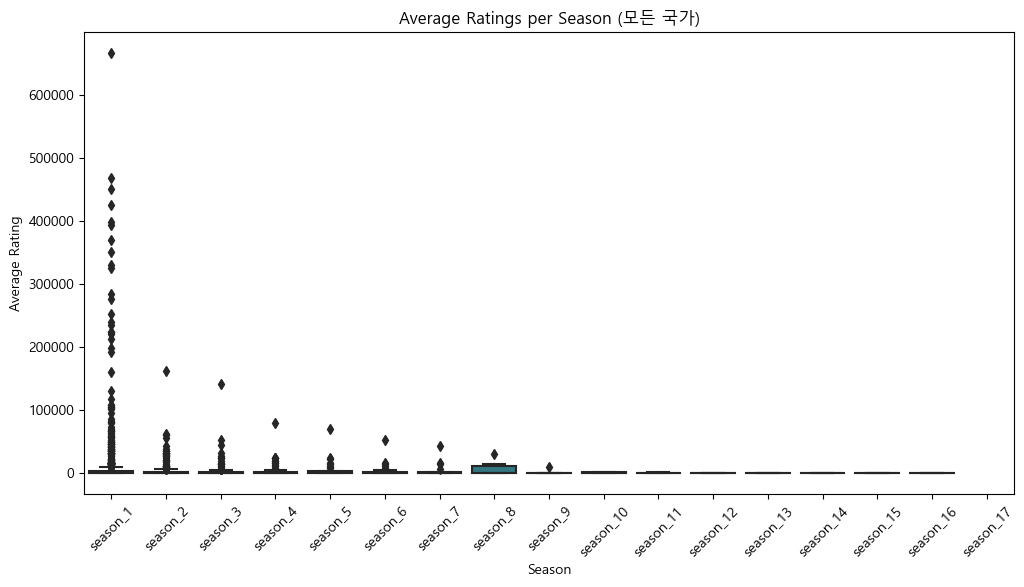

In [288]:
# 데이터 프레임 복제
imdb_data = imdb.copy()
watcha_data = watcha.copy()

# Preprocess the production_country to consider only the first country listed
imdb_data['primary_production_country'] = imdb_data['production_country'].apply(lambda x: x.split(',')[0] if pd.notna(x) else x)

# Merge IMDb and Watcha data to add primary_production_country to Watcha data
watcha_data = pd.merge(watcha_data, imdb_data[['korean_title', 'english_title', 'year', 'primary_production_country']], on=['korean_title', 'english_title', 'year'], how='left')

# Filter out rows where the primary production country is South Korea
watcha_filtered = watcha_data

# Extract season columns from Watcha data
season_columns = [col for col in watcha_filtered.columns if col.startswith('season')]

# Create a DataFrame to store the average ratings per season
average_ratings_per_season = pd.DataFrame()

# Extract the average rating for each season
for season in season_columns:
    average_ratings_per_season[season] = watcha_filtered[season].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)

# Melt the DataFrame for easier plotting
average_ratings_per_season_melted = average_ratings_per_season.melt(var_name='Season', value_name='Average Rating')

# Convert 'Average Rating' to numeric (in case it's not already)
average_ratings_per_season_melted['Average Rating'] = pd.to_numeric(average_ratings_per_season_melted['Average Rating'], errors='coerce')

# Plot the data
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='Average Rating', data=average_ratings_per_season_melted, palette='viridis')
plt.title('Average Ratings per Season (모든 국가)')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

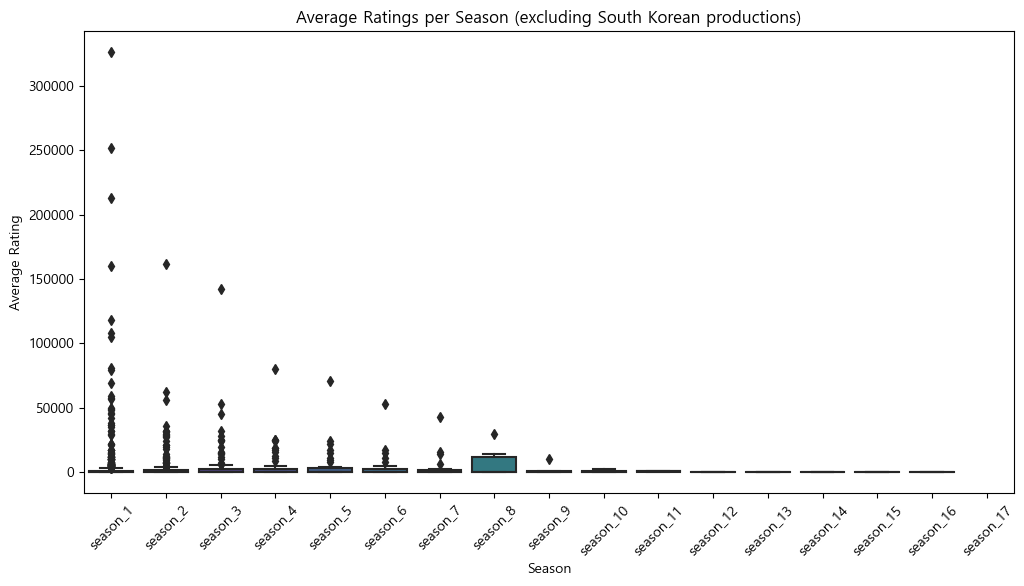

In [336]:
# 데이터 프레임 복제
imdb_data = imdb.copy()
watcha_data = watcha.copy()

# Preprocess the production_country to consider only the first country listed
imdb_data['primary_production_country'] = imdb_data['production_country'].apply(lambda x: x.split(',')[0] if pd.notna(x) else x)

# Merge IMDb and Watcha data to add primary_production_country to Watcha data
watcha_data = pd.merge(watcha_data, imdb_data[['korean_title', 'english_title', 'year', 'primary_production_country']], on=['korean_title', 'english_title', 'year'], how='left')

# Filter out rows where the primary production country is South Korea
watcha_filtered = watcha_data[watcha_data['primary_production_country'] != '대한민국']

# Extract season columns from Watcha data
season_columns = [col for col in watcha_filtered.columns if col.startswith('season')]

# Create a DataFrame to store the average ratings per season
average_ratings_per_season = pd.DataFrame()

# Extract the average rating for each season
for season in season_columns:
    average_ratings_per_season[season] = watcha_filtered[season].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)

# Melt the DataFrame for easier plotting
average_ratings_per_season_melted = average_ratings_per_season.melt(var_name='Season', value_name='Average Rating')

# Convert 'Average Rating' to numeric (in case it's not already)
average_ratings_per_season_melted['Average Rating'] = pd.to_numeric(average_ratings_per_season_melted['Average Rating'], errors='coerce')

# Plot the data
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='Average Rating', data=average_ratings_per_season_melted, palette='viridis')
plt.title('Average Ratings per Season (excluding South Korean productions)')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

C:\Users\mycom\miniconda3\envs\ds_study\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\mycom\miniconda3\envs\ds_study\lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


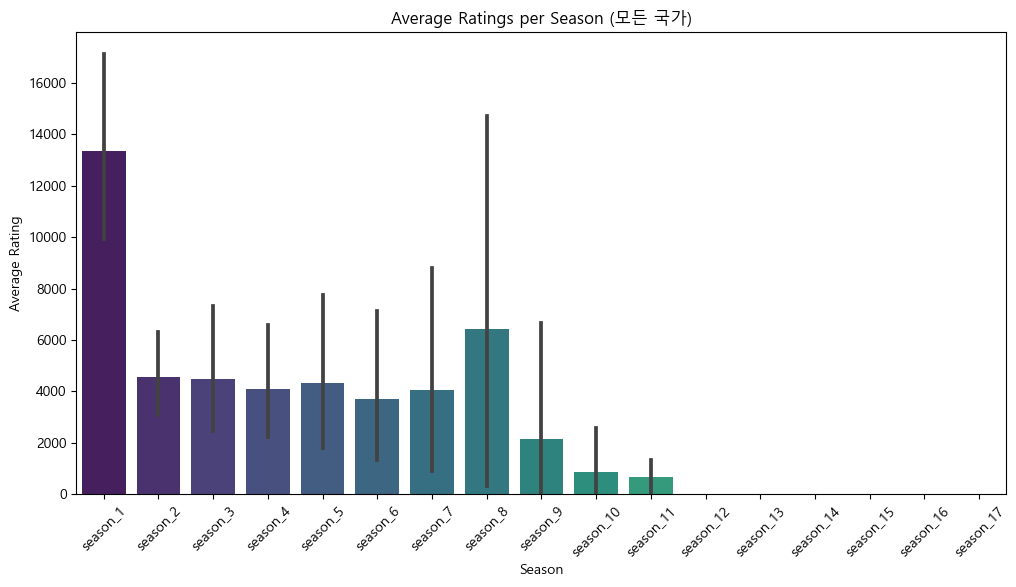

In [337]:
# 데이터 프레임 복제
imdb_data = imdb.copy()
watcha_data = watcha.copy()

# Preprocess the production_country to consider only the first country listed
imdb_data['primary_production_country'] = imdb_data['production_country'].apply(lambda x: x.split(',')[0] if pd.notna(x) else x)

# Merge IMDb and Watcha data to add primary_production_country to Watcha data
watcha_data = pd.merge(watcha_data, imdb_data[['korean_title', 'english_title', 'year', 'primary_production_country']], on=['korean_title', 'english_title', 'year'], how='left')

# Filter out rows where the primary production country is South Korea
watcha_filtered = watcha_data

# Extract season columns from Watcha data
season_columns = [col for col in watcha_filtered.columns if col.startswith('season')]

# Create a DataFrame to store the average ratings per season
average_ratings_per_season = pd.DataFrame()

# Extract the average rating for each season
for season in season_columns:
    average_ratings_per_season[season] = watcha_filtered[season].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)

# Melt the DataFrame for easier plotting
average_ratings_per_season_melted = average_ratings_per_season.melt(var_name='Season', value_name='Average Rating')

# Convert 'Average Rating' to numeric (in case it's not already)
average_ratings_per_season_melted['Average Rating'] = pd.to_numeric(average_ratings_per_season_melted['Average Rating'], errors='coerce')

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Average Rating', data=average_ratings_per_season_melted, palette='viridis')
plt.title('Average Ratings per Season (모든 국가)')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

C:\Users\mycom\miniconda3\envs\ds_study\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\mycom\miniconda3\envs\ds_study\lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


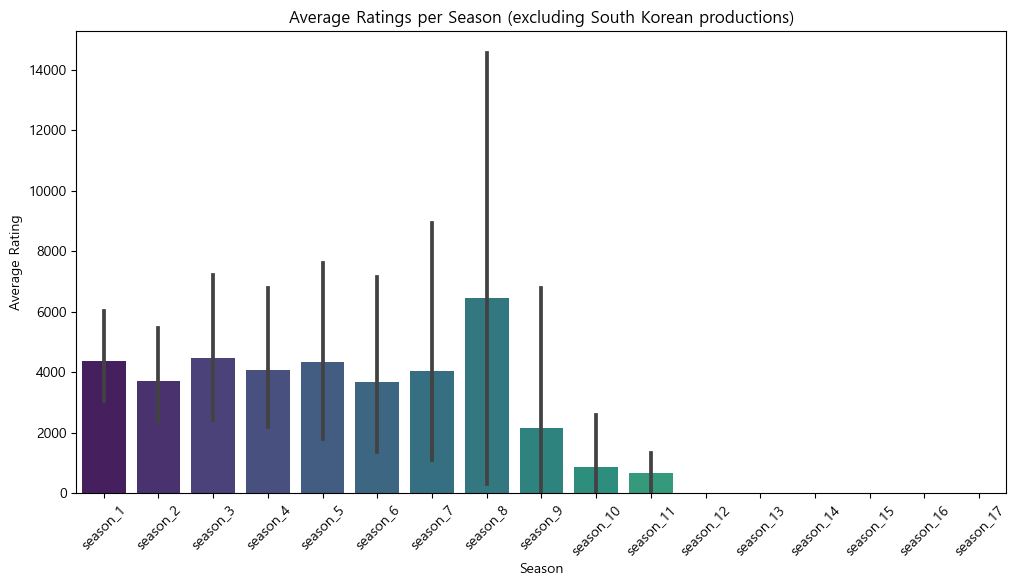

In [338]:
# 데이터 프레임 복제
imdb_data = imdb.copy()
watcha_data = watcha.copy()

# Preprocess the production_country to consider only the first country listed
imdb_data['primary_production_country'] = imdb_data['production_country'].apply(lambda x: x.split(',')[0] if pd.notna(x) else x)

# Merge IMDb and Watcha data to add primary_production_country to Watcha data
watcha_data = pd.merge(watcha_data, imdb_data[['korean_title', 'english_title', 'year', 'primary_production_country']], on=['korean_title', 'english_title', 'year'], how='left')

# Filter out rows where the primary production country is South Korea
watcha_filtered = watcha_data[watcha_data['primary_production_country'] != '대한민국']

# Extract season columns from Watcha data
season_columns = [col for col in watcha_filtered.columns if col.startswith('season')]

# Create a DataFrame to store the average ratings per season
average_ratings_per_season = pd.DataFrame()

# Extract the average rating for each season
for season in season_columns:
    average_ratings_per_season[season] = watcha_filtered[season].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)

# Melt the DataFrame for easier plotting
average_ratings_per_season_melted = average_ratings_per_season.melt(var_name='Season', value_name='Average Rating')

# Convert 'Average Rating' to numeric (in case it's not already)
average_ratings_per_season_melted['Average Rating'] = pd.to_numeric(average_ratings_per_season_melted['Average Rating'], errors='coerce')

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Average Rating', data=average_ratings_per_season_melted, palette='viridis')
plt.title('Average Ratings per Season (excluding South Korean productions)')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

### (16) 왓챠의 리뷰 수
- 한국 제외 시 아웃라이어들이 드러남
- 리뷰 수가 많은 드라마들은 200부터 1000까지에 몰려 있는듯
- barplot으로 살펴봤을 때 시즌 1 평균 평점은 한국 제외 시 확연히 감소

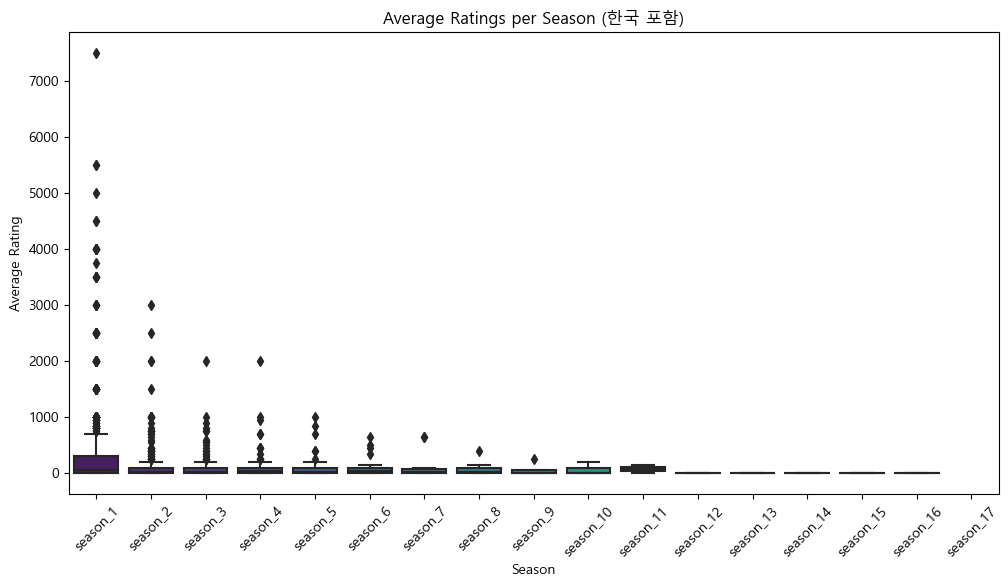

In [339]:
# 데이터 프레임 복제
imdb_data = imdb.copy()
watcha_data = watcha.copy()

# Preprocess the production_country to consider only the first country listed
imdb_data['primary_production_country'] = imdb_data['production_country'].apply(lambda x: x.split(',')[0] if pd.notna(x) else x)

# Merge IMDb and Watcha data to add primary_production_country to Watcha data
watcha_data = pd.merge(watcha_data, imdb_data[['korean_title', 'english_title', 'year', 'primary_production_country']], on=['korean_title', 'english_title', 'year'], how='left')

# Filter out rows where the primary production country is South Korea
watcha_filtered = watcha_data

# Extract season columns from Watcha data
season_columns = [col for col in watcha_filtered.columns if col.startswith('season')]

# Create a DataFrame to store the average ratings per season
average_ratings_per_season = pd.DataFrame()

# Extract the average rating for each season
for season in season_columns:
    average_ratings_per_season[season] = watcha_filtered[season].apply(lambda x: x[2] if isinstance(x, list) and len(x) > 1 else None)

# Melt the DataFrame for easier plotting
average_ratings_per_season_melted = average_ratings_per_season.melt(var_name='Season', value_name='Average Rating')

# Convert 'Average Rating' to numeric (in case it's not already)
average_ratings_per_season_melted['Average Rating'] = pd.to_numeric(average_ratings_per_season_melted['Average Rating'], errors='coerce')

# Plot the data
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='Average Rating', data=average_ratings_per_season_melted, palette='viridis')
plt.title('Average Ratings per Season (한국 포함)')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

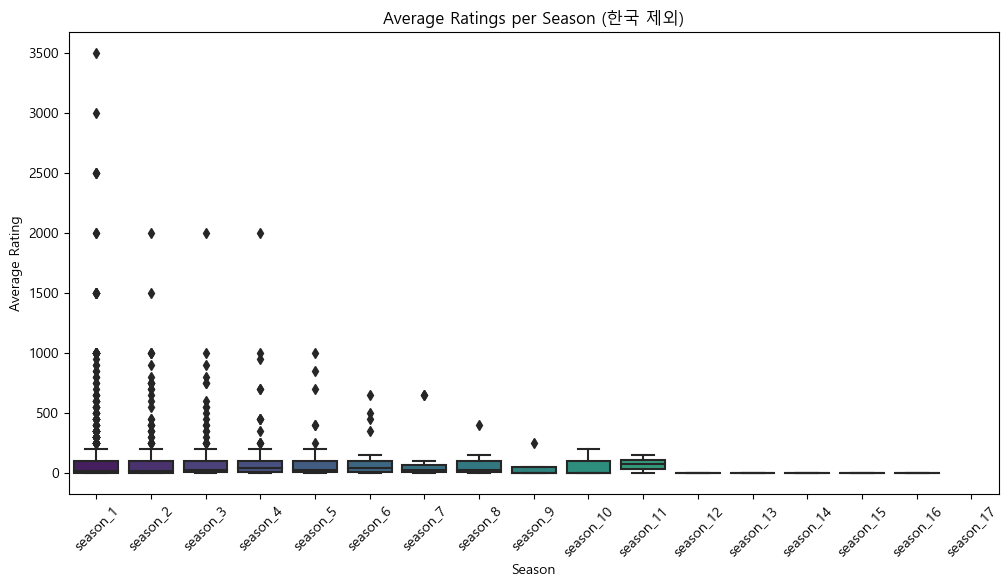

In [340]:
# 데이터 프레임 복제
imdb_data = imdb.copy()
watcha_data = watcha.copy()

# Preprocess the production_country to consider only the first country listed
imdb_data['primary_production_country'] = imdb_data['production_country'].apply(lambda x: x.split(',')[0] if pd.notna(x) else x)

# Merge IMDb and Watcha data to add primary_production_country to Watcha data
watcha_data = pd.merge(watcha_data, imdb_data[['korean_title', 'english_title', 'year', 'primary_production_country']], on=['korean_title', 'english_title', 'year'], how='left')

# Filter out rows where the primary production country is South Korea
watcha_filtered = watcha_data[watcha_data['primary_production_country'] != '대한민국']

# Extract season columns from Watcha data
season_columns = [col for col in watcha_filtered.columns if col.startswith('season')]

# Create a DataFrame to store the average ratings per season
average_ratings_per_season = pd.DataFrame()

# Extract the average rating for each season
for season in season_columns:
    average_ratings_per_season[season] = watcha_filtered[season].apply(lambda x: x[2] if isinstance(x, list) and len(x) > 1 else None)

# Melt the DataFrame for easier plotting
average_ratings_per_season_melted = average_ratings_per_season.melt(var_name='Season', value_name='Average Rating')

# Convert 'Average Rating' to numeric (in case it's not already)
average_ratings_per_season_melted['Average Rating'] = pd.to_numeric(average_ratings_per_season_melted['Average Rating'], errors='coerce')

# Plot the data
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='Average Rating', data=average_ratings_per_season_melted, palette='viridis')
plt.title('Average Ratings per Season (한국 제외)')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

C:\Users\mycom\miniconda3\envs\ds_study\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\mycom\miniconda3\envs\ds_study\lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


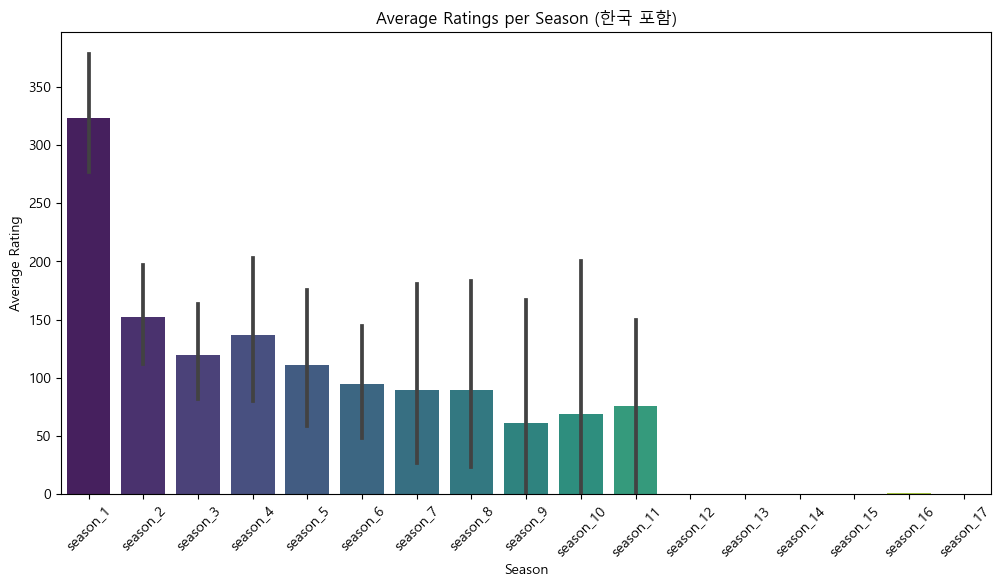

In [341]:
# 데이터 프레임 복제
imdb_data = imdb.copy()
watcha_data = watcha.copy()

# Preprocess the production_country to consider only the first country listed
imdb_data['primary_production_country'] = imdb_data['production_country'].apply(lambda x: x.split(',')[0] if pd.notna(x) else x)

# Merge IMDb and Watcha data to add primary_production_country to Watcha data
watcha_data = pd.merge(watcha_data, imdb_data[['korean_title', 'english_title', 'year', 'primary_production_country']], on=['korean_title', 'english_title', 'year'], how='left')

# Filter out rows where the primary production country is South Korea
watcha_filtered = watcha_data

# Extract season columns from Watcha data
season_columns = [col for col in watcha_filtered.columns if col.startswith('season')]

# Create a DataFrame to store the average ratings per season
average_ratings_per_season = pd.DataFrame()

# Extract the average rating for each season
for season in season_columns:
    average_ratings_per_season[season] = watcha_filtered[season].apply(lambda x: x[2] if isinstance(x, list) and len(x) > 1 else None)

# Melt the DataFrame for easier plotting
average_ratings_per_season_melted = average_ratings_per_season.melt(var_name='Season', value_name='Average Rating')

# Convert 'Average Rating' to numeric (in case it's not already)
average_ratings_per_season_melted['Average Rating'] = pd.to_numeric(average_ratings_per_season_melted['Average Rating'], errors='coerce')

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Average Rating', data=average_ratings_per_season_melted, palette='viridis')
plt.title('Average Ratings per Season (한국 포함)')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

C:\Users\mycom\miniconda3\envs\ds_study\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\mycom\miniconda3\envs\ds_study\lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


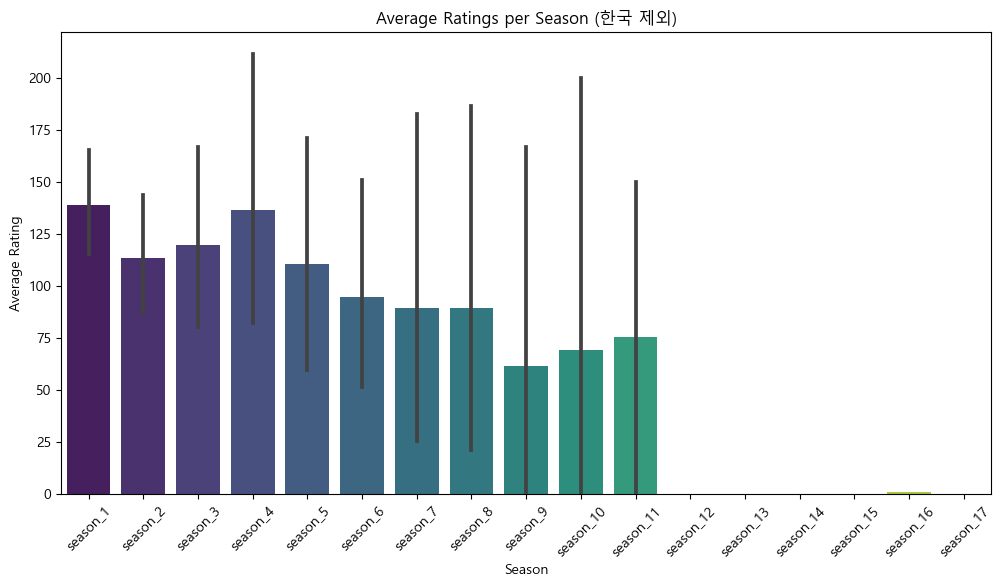

In [342]:
# 데이터 프레임 복제
imdb_data = imdb.copy()
watcha_data = watcha.copy()

# Preprocess the production_country to consider only the first country listed
imdb_data['primary_production_country'] = imdb_data['production_country'].apply(lambda x: x.split(',')[0] if pd.notna(x) else x)

# Merge IMDb and Watcha data to add primary_production_country to Watcha data
watcha_data = pd.merge(watcha_data, imdb_data[['korean_title', 'english_title', 'year', 'primary_production_country']], on=['korean_title', 'english_title', 'year'], how='left')

# Filter out rows where the primary production country is South Korea
watcha_filtered = watcha_data[watcha_data['primary_production_country'] != '대한민국']

# Extract season columns from Watcha data
season_columns = [col for col in watcha_filtered.columns if col.startswith('season')]

# Create a DataFrame to store the average ratings per season
average_ratings_per_season = pd.DataFrame()

# Extract the average rating for each season
for season in season_columns:
    average_ratings_per_season[season] = watcha_filtered[season].apply(lambda x: x[2] if isinstance(x, list) and len(x) > 1 else None)

# Melt the DataFrame for easier plotting
average_ratings_per_season_melted = average_ratings_per_season.melt(var_name='Season', value_name='Average Rating')

# Convert 'Average Rating' to numeric (in case it's not already)
average_ratings_per_season_melted['Average Rating'] = pd.to_numeric(average_ratings_per_season_melted['Average Rating'], errors='coerce')

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Average Rating', data=average_ratings_per_season_melted, palette='viridis')
plt.title('Average Ratings per Season (한국 제외)')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [347]:
watcha.to_excel('./watcha.xlsx')